# Encoding

Structures from the [KLIFS](klifs.net) database can be encoded as `kissim` fingerprint. This kinase fingerprint is based on the KLIFS pocket alignment, which defines 85 pocket residues for all kinase structures. This enables a residue-by-residue comparison without a computationally expensive alignment step.
The pocket fingerprint consists of 85 concatenated residue fingerprints, each encoding a residue’s spatial and physicochemical properties (see Figure 1). The spatial properties describe the residue’s position in relation to the kinase pocket centroid and important kinase subpockets, i.e. the hinge region, the DFG region, and the front pocket. The physicochemical properties encompass for each residue its size and pharmacophoric features, solvent exposure and side chain orientation.

![The `kissim` fingerprint composition.](../_static/kissim_fingerprint.png)

_Figure 1_: The `kissim` fingerprint.


In [1]:
from pathlib import Path

In [2]:
# Path to this notebook
HERE = Path(_dh[-1])  # noqa: F821

Set up remote and local KLIFS session using the `opencadd.databases.klifs` module.

In [3]:
from opencadd.databases.klifs import setup_remote, setup_local

KLIFS_REMOTE = setup_remote()
KLIFS_LOCAL = setup_local(HERE / "../../kissim/tests/data/KLIFS_download/")

## Encode one structure

In [4]:
from kissim.encoding import Fingerprint

In [5]:
# flake8-noqa-cell
Fingerprint.from_structure_klifs_id?

Signature: Fingerprint.from_structure_klifs_id(structure_klifs_id, klifs_session=None)
Docstring:
Calculate fingerprint for a KLIFS structure (by structure KLIFS ID).

Parameters
----------
structure_klifs_id : int
    Structure KLIFS ID.
klifs_session : opencadd.databases.klifs.session.Session or None
    Local or remote KLIFS session.
    If None (default), set up remote KLIFS session.

Returns
-------
kissim.encoding.Fingerprint
    Fingerprint.
File:      ~/Documents/GitHub/kissim/kissim/encoding/fingerprint.py
Type:      method


### Generate fingerprint from remote KLIFS session

In [6]:
fingerprint = Fingerprint.from_structure_klifs_id(109)

In [7]:
fingerprint = Fingerprint.from_structure_klifs_id(109, KLIFS_REMOTE)

### Generate fingerprint from local KLIFS session

In [8]:
fingerprint = Fingerprint.from_structure_klifs_id(109, KLIFS_LOCAL)

### Explore `Fingerprint` object

In [9]:
fingerprint.physicochemical

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue.ix,,,,,,,,
1,2.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0
2,2.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0
3,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...
81,2.0,0.0,2.0,-1.0,0.0,0.0,3.0,3.0
82,3.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
83,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0


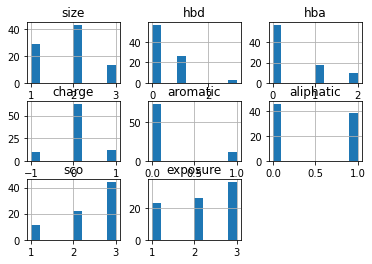

In [10]:
fingerprint.physicochemical.hist();

In [11]:
fingerprint.distances

,hinge_region,dfg_region,front_pocket,center
residue.ix,,,,
1,13.638825,18.151474,14.976771,17.175079
2,11.992615,15.466840,12.175196,14.700109
3,9.609095,14.682669,9.020685,12.176826
4,11.448428,15.794301,8.619237,12.807139
5,14.557948,17.282959,11.822055,15.756100
...,...,...,...,...
81,9.265642,7.738092,6.713789,4.406957
82,8.524595,6.593623,5.218254,4.892906
83,11.939774,6.238186,8.907651,8.120236


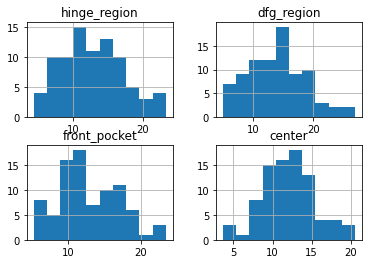

In [12]:
fingerprint.distances.hist();

In [13]:
fingerprint.moments

,hinge_region,dfg_region,front_pocket,center
moments,,,,
1,12.744562,13.951375,12.748791,12.093494
2,4.411861,4.842253,4.286650,3.403159
3,2.920387,3.377544,3.075991,1.621391


You can select which feature types you would like to extract from the fingerprint: bits for physicochemical, distances, and/or moments features.

| physicochemical | distances | moments | fingerprint length |
|-----------------|-----------|---------|--------------------|
| True            | True      | True    | 1032               |
| True            | True      | False   | 1020               |
| True            | False     | True    | 692                |
| True            | False     | False   | 680                |
| False           | True      | True    | 352                |
| False           | True      | False   | 340                |
| False           | False     | True    | 12                 |
| False           | False     | False   | 0                  |

In [14]:
fingerprint_array = fingerprint.values_array(
    physicochemical=True, spatial_distances=True, spatial_moments=True
)

In [15]:
import pandas as pd

pd.DataFrame({"residue.id": fingerprint.residue_ids, "residue.ix": fingerprint.residue_ixs})

,residue.id,residue.ix
0,292,1
1,293,2
2,294,3
3,295,4
4,296,5
...,...,...
80,427,81
81,428,82
82,429,83
83,430,84


### Normalize fingerprint

In [16]:
from kissim.encoding import FingerprintNormalized

fingerprint_normalized = FingerprintNormalized.from_fingerprint(fingerprint)

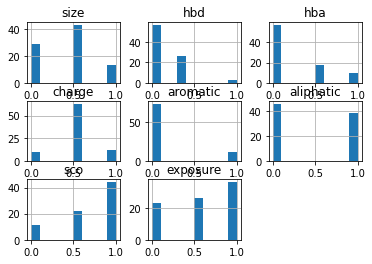

In [17]:
fingerprint_normalized.physicochemical.hist();

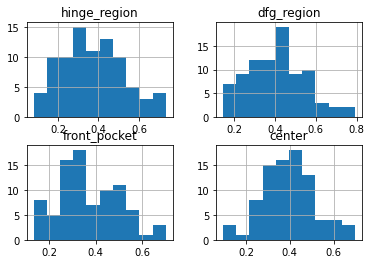

In [18]:
fingerprint_normalized.distances.hist();

### Save/load fingerprints

In [19]:
json_filepath = Path("fingerprint.json")

In [20]:
fingerprint.to_json(json_filepath)
Fingerprint.from_json(json_filepath)

In [21]:
json_filepath.unlink()

## Encode multiple structures

In [22]:
from kissim.encoding import FingerprintGenerator

In [23]:
# flake8-noqa-cell
FingerprintGenerator.from_structure_klifs_ids?

Signature:
FingerprintGenerator.from_structure_klifs_ids(
    structure_klifs_ids,
    klifs_session=None,
    n_cores=1,
)
Docstring:
Calculate fingerprints for one or more KLIFS structures (by structure KLIFS IDs).

Parameters
----------
structure_klifs_id : int
    Input structure KLIFS ID (output fingerprints may contain less IDs because some
    structures could not be encoded).
klifs_session : opencadd.databases.klifs.session.Session
    Local or remote KLIFS session.
n_cores : int or None
    Number of cores to be used for fingerprint generation as defined by the user.

Returns
-------
kissim.encoding.fingerprint_generator
    Fingerprint generator object containing fingerprints.
File:      ~/Documents/GitHub/kissim/kissim/encoding/fingerprint_generator.py
Type:      method


### Select structure KLIFS IDs

In [24]:
structure_klifs_ids = [109, 118, 12347, 1641, 3833, 9122]

### Generate fingerprints from remote KLIFS session

In [25]:
fingerprint_generator = FingerprintGenerator.from_structure_klifs_ids(
    structure_klifs_ids=structure_klifs_ids, klifs_session=KLIFS_REMOTE, n_cores=2
)

### Generate fingerprints from local KLIFS session

In [26]:
fingerprint_generator = FingerprintGenerator.from_structure_klifs_ids(
    structure_klifs_ids=structure_klifs_ids, klifs_session=KLIFS_LOCAL, n_cores=2
)

### Save/load fingerprints

In [27]:
json_filepath = Path("fingerprints.json")

In [28]:
fingerprint_generator.to_json(json_filepath)
FingerprintGenerator.from_json(json_filepath)

In [29]:
json_filepath.unlink()

## Calculate individual features

### Load pocket

In [30]:
from kissim.io import PocketBioPython, PocketDataFrame

pocket_bp = PocketBioPython.from_structure_klifs_id(12347)
pocket_df = PocketDataFrame.from_structure_klifs_id(12347)

### SiteAlign features

![The `kissim` fingerprint composition.](../_static/kissim_fingerprint_sitealign.png)

_Figure 2_: The SiteAlign feature bits of the `kissim` fingerprint.

Select one of the SiteAlign features:

- `"hba"`: Hydrogen bond acceptor feature
- `"hbd"`: Hydrogen bond donor feature
- `"size"`: Size feature
- `"charge"`: Charge feature
- `"aliphatic"`: Aliphatic feature
- `"aromatic"`: Aromatic feature

In [31]:
from kissim.encoding.features import SiteAlignFeature

feature_sitealign = SiteAlignFeature.from_pocket(pocket_bp, feature_name="hba")

In [32]:
print("Number of bits: ", len(feature_sitealign.values))
print(*feature_sitealign.values)

Number of bits:  85
1.0 0.0 0.0 nan nan nan nan 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 2.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 nan nan nan


In [33]:
feature_sitealign.details

,residue.id,residue.name,sitealign.category
residue.ix,,,
1,461,GLN,1
2,462,ARG,0
3,463,ILE,0
4,<NA>,None,<NA>
5,<NA>,None,<NA>
...,...,...,...
81,594,ASP,2
82,595,PHE,0
83,<NA>,None,<NA>


### Side chain orientation

![The `kissim` fingerprint composition.](../_static/kissim_fingerprint_sco.png)

_Figure 3_: The side chain orientation feature bits of the `kissim` fingerprint.

In [34]:
from kissim.encoding.features import SideChainOrientationFeature

feature_sco = SideChainOrientationFeature.from_pocket(pocket_bp)

In [35]:
print("Number of bits: ", len(feature_sco.values))
print(*feature_sco.values)

Number of bits:  85
2.0 nan nan nan nan nan nan 3.0 nan 3.0 2.0 nan nan 3.0 1.0 3.0 nan nan nan 2.0 2.0 nan 3.0 nan 3.0 nan 2.0 nan nan 3.0 1.0 3.0 3.0 3.0 3.0 1.0 3.0 3.0 3.0 nan 3.0 3.0 2.0 3.0 1.0 2.0 3.0 1.0 nan nan 3.0 3.0 3.0 3.0 3.0 2.0 nan 2.0 1.0 2.0 1.0 2.0 3.0 2.0 3.0 2.0 3.0 1.0 3.0 2.0 3.0 2.0 nan 3.0 2.0 3.0 3.0 3.0 3.0 nan 3.0 2.0 nan nan nan


In [36]:
feature_sco.details

,residue.id,sco.category,sco.angle,ca.vector,sc.vector,pocket_center.vector
residue.ix,,,,,,
1,461,2.0,84.436343,"<Vector 8.81, 16.81, 51.66>","<Vector 5.63, 14.81, 52.26>","<Vector 0.83, 21.62, 36.45>"
2,462,NaN,NaN,"<Vector 8.91, 14.91, 48.36>",None,"<Vector 0.83, 21.62, 36.45>"
3,463,NaN,NaN,"<Vector 5.48, 13.77, 47.17>",None,"<Vector 0.83, 21.62, 36.45>"
4,<NA>,NaN,NaN,None,None,"<Vector 0.83, 21.62, 36.45>"
5,<NA>,NaN,NaN,None,None,"<Vector 0.83, 21.62, 36.45>"
...,...,...,...,...,...,...
81,594,3.0,92.784985,"<Vector 1.83, 18.43, 34.14>","<Vector 1.72, 16.82, 36.09>","<Vector 0.83, 21.62, 36.45>"
82,595,2.0,59.266540,"<Vector 2.38, 19.71, 30.60>","<Vector 0.31, 24.33, 31.38>","<Vector 0.83, 21.62, 36.45>"
83,<NA>,NaN,NaN,None,None,"<Vector 0.83, 21.62, 36.45>"


### Exposure

![The `kissim` fingerprint composition.](../_static/kissim_fingerprint_exposure.png)

_Figure 4_: The solvent exposure feature bits of the `kissim` fingerprint.

In [37]:
from kissim.encoding.features import SolventExposureFeature

feature_exposure = SolventExposureFeature.from_pocket(pocket_bp)

In [38]:
print("Number of bits: ", len(feature_exposure.values))
print(*feature_exposure.values)

Number of bits:  85
3.0 3.0 1.0 nan nan nan nan 3.0 1.0 2.0 3.0 2.0 3.0 1.0 3.0 2.0 3.0 2.0 3.0 2.0 1.0 3.0 3.0 2.0 1.0 3.0 1.0 1.0 3.0 3.0 1.0 3.0 3.0 2.0 3.0 2.0 3.0 2.0 3.0 3.0 3.0 1.0 3.0 2.0 3.0 3.0 3.0 1.0 3.0 1.0 3.0 3.0 1.0 3.0 3.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0 2.0 1.0 3.0 1.0 3.0 1.0 3.0 3.0 1.0 3.0 2.0 3.0 2.0 1.0 3.0 2.0 2.0 3.0 2.0 1.0 nan nan nan


In [39]:
feature_exposure.details

,residue.id,exposure.category,exposure.ratio,exposure.ratio_ca,exposure.ratio_cb
residue.ix,,,,,
1,461.0,3.0,0.875000,1.000000,0.875000
2,462.0,3.0,0.785714,0.500000,0.785714
3,463.0,1.0,0.312500,NaN,0.312500
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
81,594.0,2.0,0.518519,0.703704,0.518519
82,595.0,1.0,0.320000,NaN,0.320000
83,NaN,NaN,NaN,NaN,NaN


### Subpocket distances

![The `kissim` fingerprint composition.](../_static/kissim_fingerprint_subpockets.png)

_Figure 5_: The spatial feature bits of the `kissim` fingerprint.

In [40]:
from kissim.encoding.features import SubpocketsFeature

feature_subpockets = SubpocketsFeature.from_pocket(pocket_df)

In [41]:
feature_subpockets.values

{'hinge_region': [13.085004250208536, 4.6390448501167905, 2.3912455031818345],
 'dfg_region': [14.305938842969063, 4.88461568697127, 3.310695450716709],
 'front_pocket': [13.30385832908826, 4.084029450633254, 2.8948181398060013],
 'center': [12.235948428129538, 3.483684294025381, -1.4928813986271416]}

In [42]:
feature_subpockets.details["distances"]

,residue.id,hinge_region,dfg_region,front_pocket,center
residue.ix,,,,,
1,461,13.169870,18.206156,14.569412,17.831911
2,462,12.055552,15.556118,12.221359,15.876463
3,463,10.828905,15.211579,9.537408,14.079297
4,<NA>,NaN,NaN,NaN,NaN
5,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...
81,594,8.630239,6.924464,5.781793,4.057558
82,595,11.446905,6.909891,9.576426,6.348532
83,<NA>,NaN,NaN,NaN,NaN


In [43]:
feature_subpockets.details["moments"]

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,13.085004,14.305939,13.303858,12.235948
2,4.639045,4.884616,4.084029,3.483684
3,2.391246,3.310695,2.894818,-1.492881
